# 6.6 Sourcing & Analyzing Time Series Data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [3]:
# Configure API key 

quandl.ApiConfig.api_key = 'PyzPQdzPuH1eC6hCLKnG'

In [4]:
# Importing the Federal Reserve Economic Data "Wage and salary workers: Network systems and data com. analysts occup." variable.

data = quandl.get('FRED/LEU0254477600A')

In [5]:
data.head(5)

,VALUE
DATE,
2000-01-01,247.0
2001-01-01,295.0
2002-01-01,263.0
2003-01-01,291.0
2004-01-01,233.0


In [6]:
data.shape

(11, 1)

In [7]:
data.columns

Index(['VALUE'], dtype='object')

In [8]:
type(data)

pandas.core.frame.DataFrame

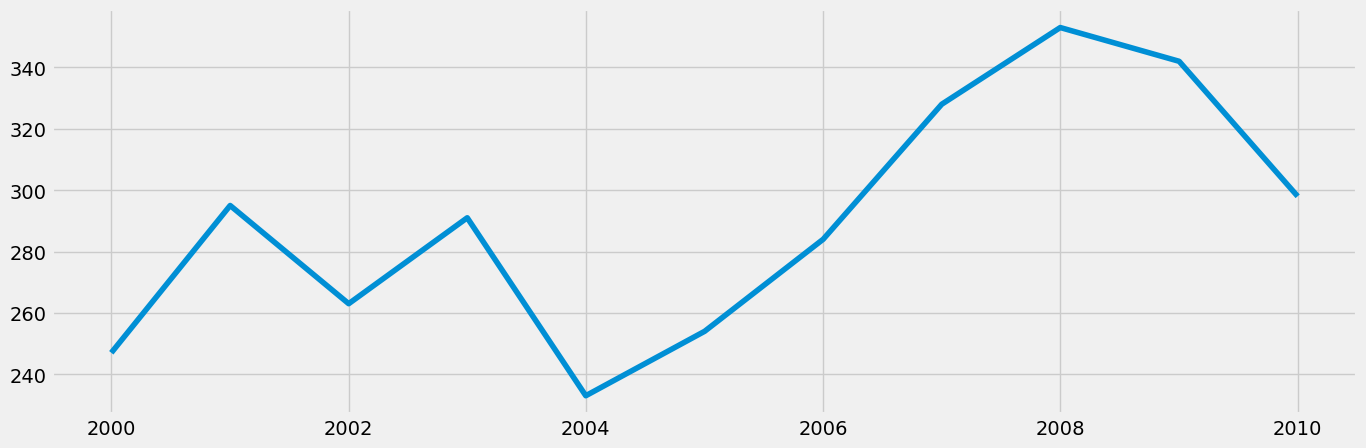

In [10]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)

#print

plt.plot(data)

## 2. Subsetting, wrangling, and cleaning time-series data

In [11]:
# Reset index to use "Date" column as a filter

data_2 = data.reset_index()

In [12]:
data_2.head()

,DATE,VALUE
0,2000-01-01,247.0
1,2001-01-01,295.0
2,2002-01-01,263.0
3,2003-01-01,291.0
4,2004-01-01,233.0


In [15]:
data_sub = data_2.loc[(data_2['DATE'] >= '1980-01-01') & (data_2['DATE'] < '2023-06-01')]

In [16]:
data_sub.shape

(11, 2)

In [17]:
data_sub.head()

,DATE,VALUE
0,2000-01-01,247.0
1,2001-01-01,295.0
2,2002-01-01,263.0
3,2003-01-01,291.0
4,2004-01-01,233.0


In [18]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['DATE']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['DATE'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,VALUE
datetime,
2000-01-01,247.0
2001-01-01,295.0
2002-01-01,263.0
2003-01-01,291.0
2004-01-01,233.0


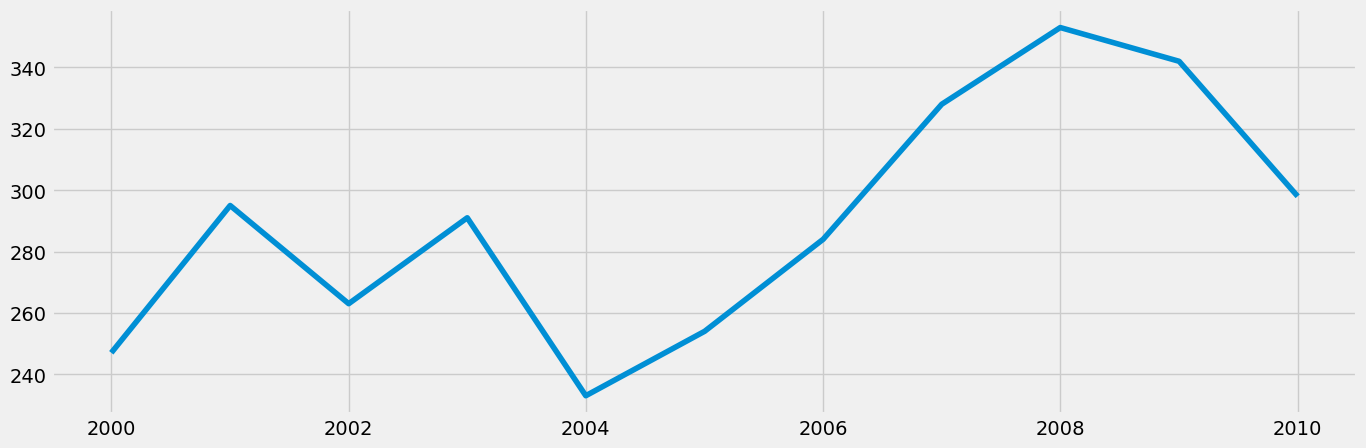

In [19]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [20]:
# Checking for missing values

data_sub.isnull().sum() 

VALUE    0
dtype: int64

In [21]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

0

## 3. Time-series analysis: decomposition

In [22]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [23]:
from pylab import rcParams # Defines a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

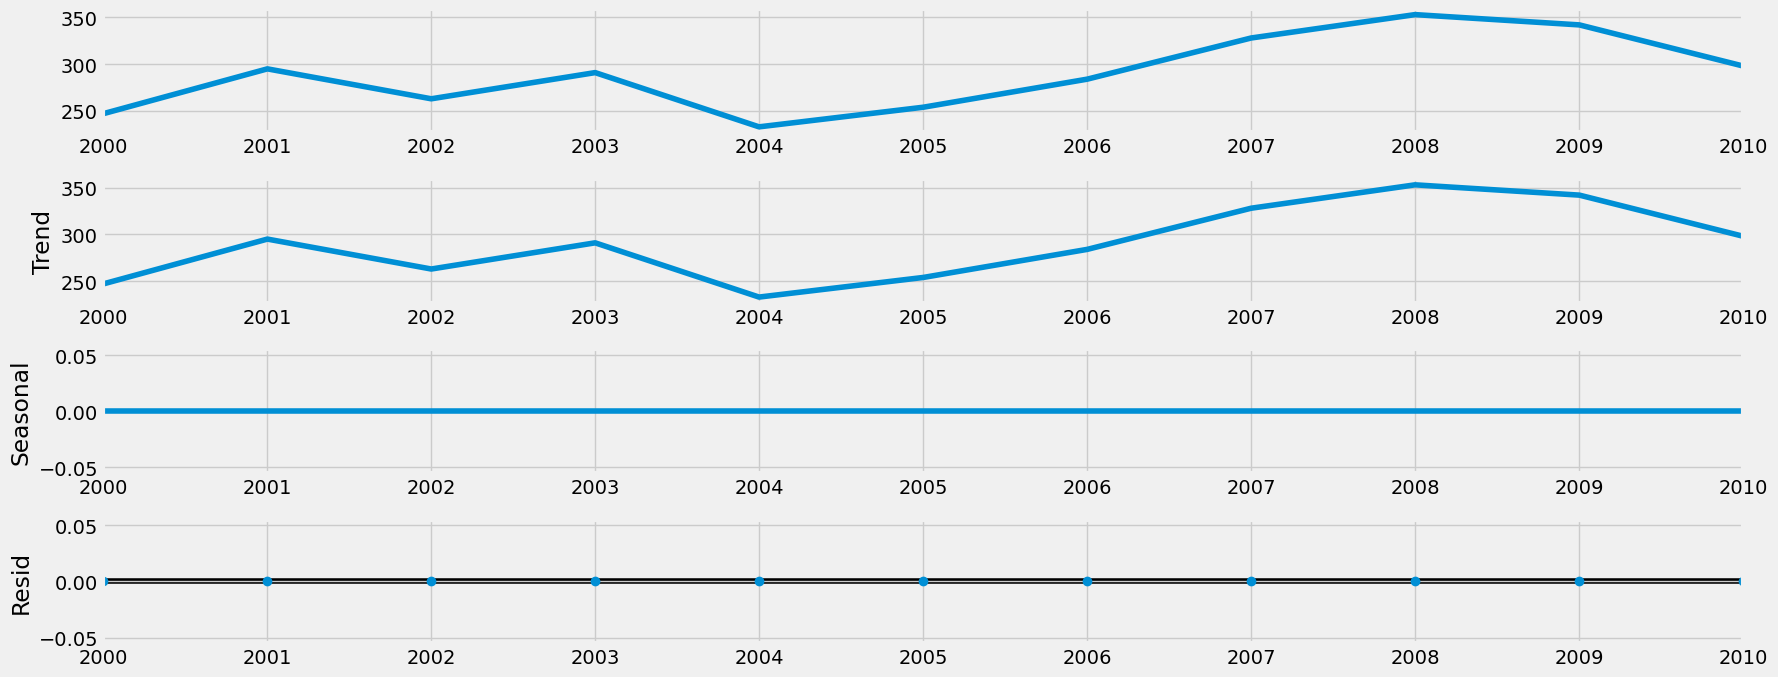

In [24]:
# Plot the separate components

decomposition.plot()
plt.show()

## 4. Testing for stationarity

In [26]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['VALUE'])

Dickey-Fuller Stationarity test:
Test Statistic                -2.786995
p-value                        0.060156
Number of Lags Used            2.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


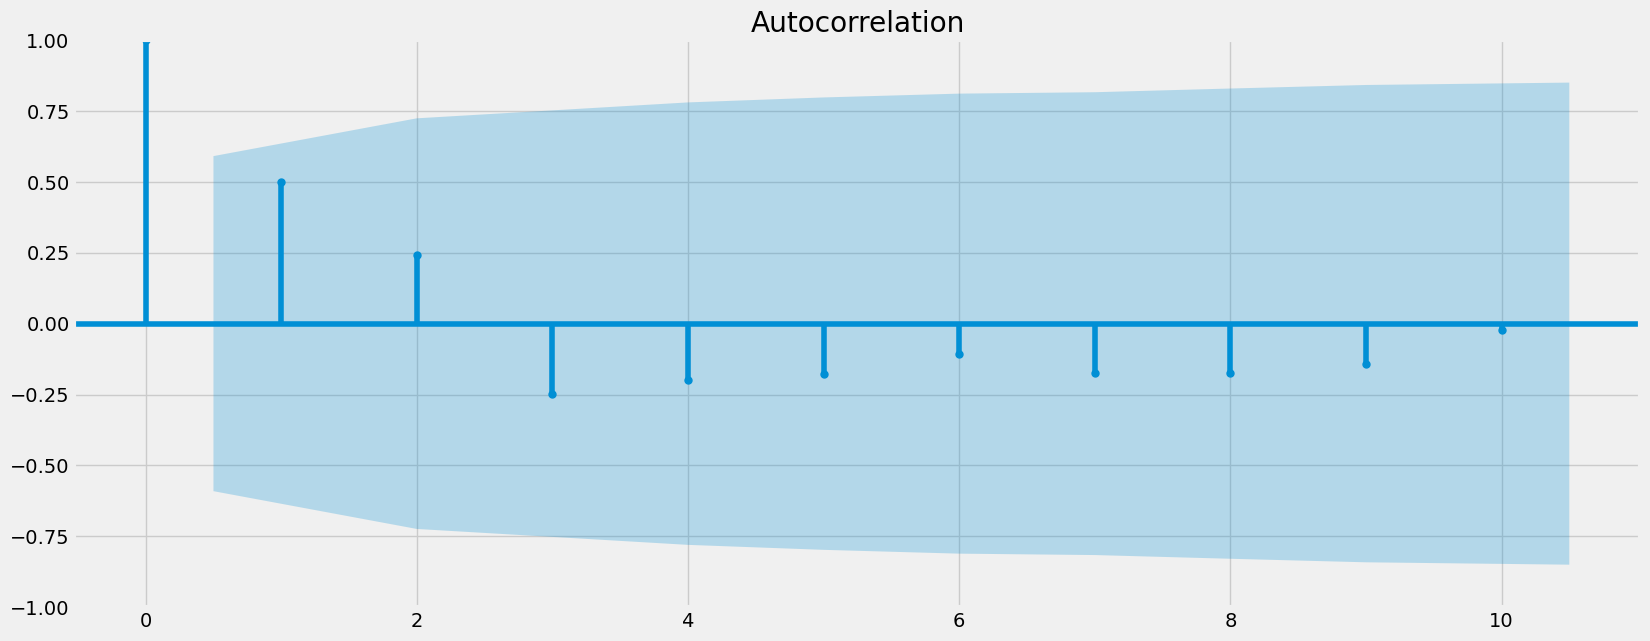

In [27]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

## 5. Stationarizing the Data

In [28]:
data_diff = data_sub - data_sub.shift(1)

In [29]:
# Removing missing Values
data_diff.dropna(inplace = True)

In [30]:
data_diff.head()

,VALUE
datetime,
2001-01-01,48.0
2002-01-01,-32.0
2003-01-01,28.0
2004-01-01,-58.0
2005-01-01,21.0


In [31]:
data_diff.columns

Index(['VALUE'], dtype='object')

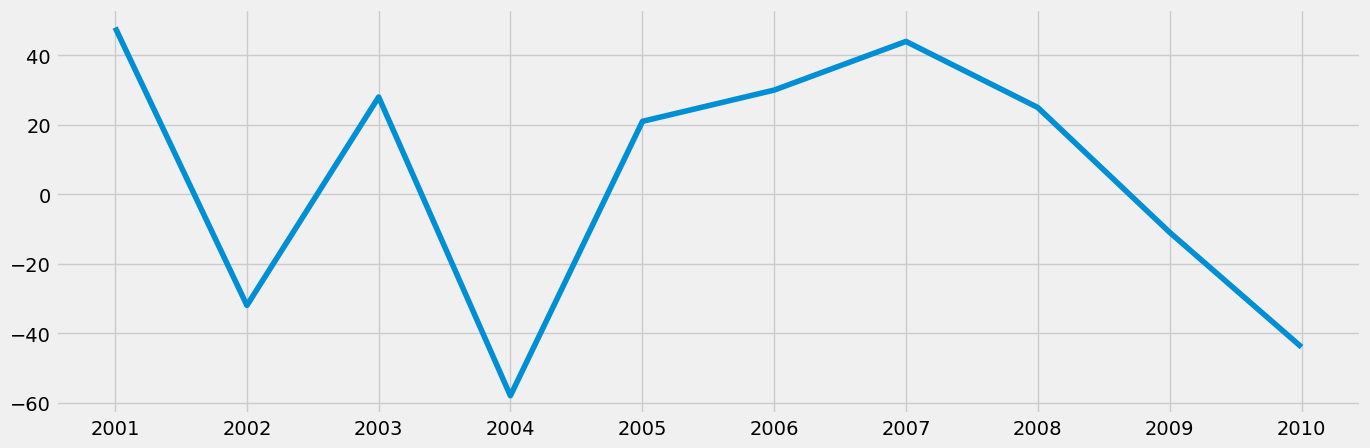

In [32]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [33]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -4.226938
p-value                        0.000593
Number of Lags Used            3.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


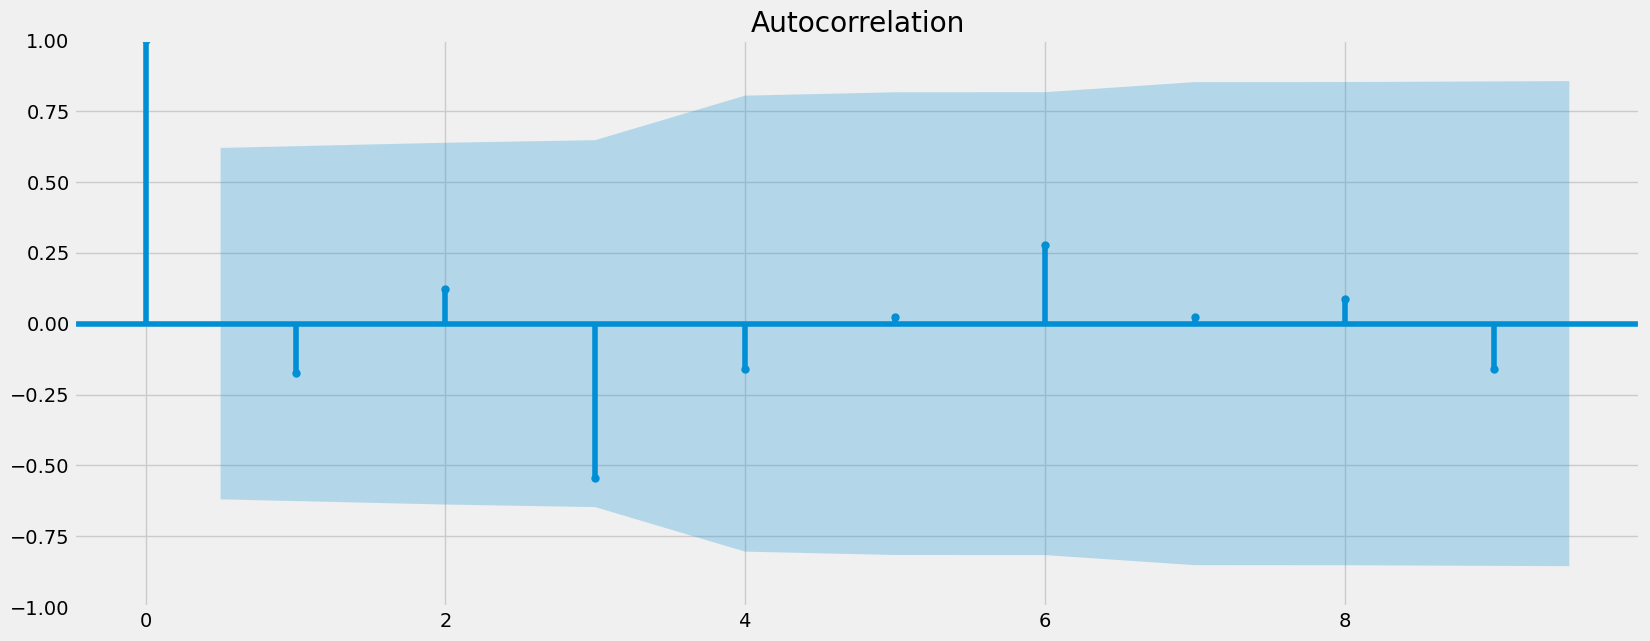

In [34]:
plot_acf(data_diff)
plt.show()